# More On Missing Data - Lab

## Introduction

In this lab, you'll continue to practice techniques for dealing with missing data. Moreover, you'll observe the impact on distributions of your data produced by various techniques for dealing with missing data.

## Objectives

You will be able to:

* Use various techniques for dealing with missing data
* Observe the impact of imputing missing values on summary statistics

## Load the Data

To start, load in the dataset `titanic.csv` using pandas.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
#Your code here

df = pd.read_csv('titanic.csv')
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Use the `.info()` Method to Quickly Preview Which Features Have Missing Data

In [5]:
#Your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Unnamed: 0     891 non-null int64
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null object
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


## Observe Previous Measures Of Centrality

Let's look at the age feature. Calculate the mean, median and standard deviation of this feature. Then plot a histogram of the distribution.

Mean: 29.69911764705882 Median: 28.0 Std: 14.526497332334042


/Users/johnnguyen/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/lib/histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/johnnguyen/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/lib/histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 0, 'Age')

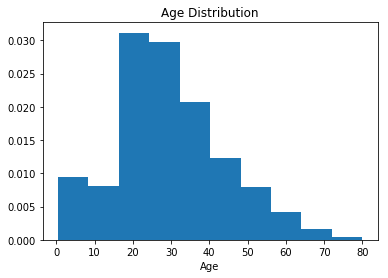

In [17]:
#Your code here
print('Mean:', df['Age'].mean(), 'Median:', df['Age'].median(), 'Std:', df['Age'].std())
plt.hist(df['Age'], density=True)
plt.title('Age Distribution')
plt.xlabel('Age')

## Impute Missing Values using the Mean 

Fill the missing age values using the average age. (Don't overwrite the original data, as we will be comparing to other methods for dealing with the missing values.) Then recalculate the mean, median, and std and replot the histogram.

Mean: 29.69911764705882 Median: 29.69911764705882 Std: 13.002015226002882


Text(0.5, 0, 'Age')

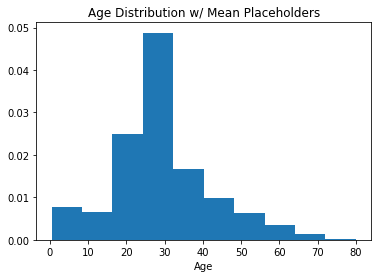

In [18]:
#Your code here
newage = df['Age'].fillna(df['Age'].mean())
print('Mean:', newage.mean(), 'Median:', newage.median(), 'Std:', newage.std())
plt.hist(newage, density=True)
plt.title('Age Distribution w/ Mean Placeholders')
plt.xlabel('Age')

### Commentary

Note that the standard deviation dropped, the median was slightly raised and the distribution has a larger mass near the center.

## Impute Missing Values using the Median 

Fill the missing age values, this time using the media age. (Again, don't overwrite the original data, as we will be comparing to other methods for dealing with the missing values.) Then recalculate the mean, median, and std and replot the histogram.

Mean: 29.36158249158249 Median: 28.0 Std: 13.019696550973201


Text(0.5, 0, 'Age')

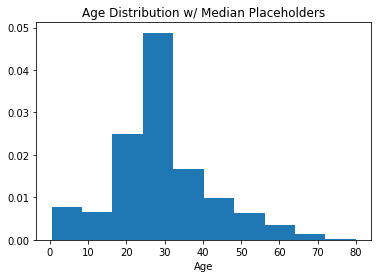

In [19]:
#Your code here
newagemed = df['Age'].fillna(df['Age'].median())
print('Mean:', newagemed.mean(), 'Median:', newagemed.median(), 'Std:', newagemed.std())
plt.hist(newagemed, density=True)
plt.title('Age Distribution w/ Median Placeholders')
plt.xlabel('Age')

### Commentary

Imputing the median has similar effectiveness to imputing the mean. The variance is reduced, while the mean is slightly lowered. You can once again see that there is a larger mass of data near the center of the distribution.

## Dropping Rows

Finally, lets observe the impact on the distribution if we were to simply drop all of the rows that are missing an age value. Afterwards, calculate the mean, median and standard deviation of the ages along with a histogram, as before.

Mean: 29.69911764705882 Median: 28.0 Std: 14.526497332334042


Text(0.5, 0, 'Age')

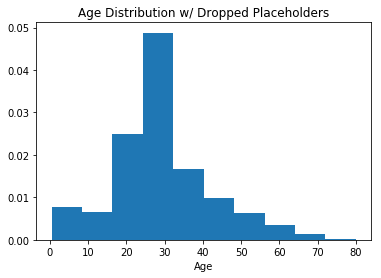

In [20]:
#Your code here
newagedrop = df[df['Age'].isna()==False]['Age']
print('Mean:', newagedrop.mean(), 'Median:', newagedrop.median(), 'Std:', newagedrop.std())
plt.hist(newagemed, density=True)
plt.title('Age Distribution w/ Dropped Placeholders')
plt.xlabel('Age')

### Commentary

Dropping null values leaves the distribution and associated measures of centrality unchanged, but at the cost of throwing away data.

## Summary

In this lab, you briefly practiced some common techniques for dealing with missing data. Moreover, you observed the impact that these methods had on the distribution of the feature itself. When you begin to tune models on your data, these considerations will be an essential process of developing robust and accurate models.